In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("fake_train.csv")

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
#checking for null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df = df.fillna('') #filling the null values

In [10]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
#dropping non essential columns
df = df.drop(['id', 'title', 'author'], axis = 1)

In [ ]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords

In [14]:
from nltk.stem.porter import PorterStemmer

In [15]:
import re

In [16]:
port_stem = PorterStemmer() # creating an object

In [17]:
#define function for removing stopwords
def stemming(content):
    con = re.sub('[^a-zA-z=Z]', ' ',content)
    con = con.lower()
    con = con.split()
    con = [port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con = ' '.join(con)
    return con

In [18]:
stemming("hi this is devika")

'hi devika'

In [20]:
df['text'] = df['text'].apply(stemming)

In [21]:
x = df['text']

In [22]:
y = df['label']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#splitting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vect = TfidfVectorizer()

In [27]:
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
pred = model.predict(x_test)

In [39]:
pred

array([1, 0, 1, ..., 1, 1, 0])

In [40]:
# accuracy
accuracy = model.score(x_test, y_test)
print("Accuracy :", accuracy)

Accuracy : 0.8754807692307692


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.87
Recall: 0.88
F1 Score: 0.88


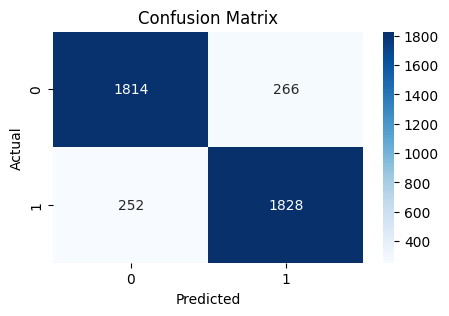

In [54]:
#confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
import pickle

In [46]:
#to store vector file
pickle.dump(vect, open('vector.pkl', 'wb'))

In [47]:
#to store model
pickle.dump(model, open('model.pkl', 'wb'))

In [48]:
vector_form = pickle.load(open('vector.pkl', 'rb')) #loading vector file

In [49]:
load_model = pickle.load(open('model.pkl', 'rb')) #loading model

In [50]:
#function to classify news
def fake_news(news):
    news = stemming(news)
    input_data = [news]
    vector_news = vector_form.transform(input_data)
    prediction = load_model.predict(vector_news)
    return prediction

In [51]:
val = fake_news("""House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license)
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen.
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, "The FBI has learned of the existence of emails that appear to be pertinent to the investigation." Case reopened
— Jason Chaffetz (@jasoninthehouse) October 28, 2016
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of “an unrelated case”–which we now know to be Anthony Weiner’s sexting with a teenager. But apparently such little things as facts didn’t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary wins–at least two years’ worth, and possibly an entire term’s worth of them. Apparently Chaffetz thought the FBI was already doing his work for him–resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud.
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetz’ sins. That aide told Shareblue that his boss and other Democrats didn’t even know about Comey’s letter at the time–and only found out when they checked Twitter. “Democratic Ranking Members on the relevant committees didn’t receive Comey’s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didn’ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.”
So let’s see if we’ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter.
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf.
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didn’t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesn’t trample on basic standards of fairness, I don’t know what does.
Granted, it’s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetz’ planned fishing expedition. But that doesn’t mean we can’t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect""")

In [52]:
if val ==[0]:
    print('reliable')
else:
    print('unrealiable')

unrealiable
